In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


In [3]:
data = pd.read_csv('C:/Users/bcspr/OneDrive/Desktop/bigger project/Dataframes/df_quito.csv')
df= data.copy()
df.drop(columns= ['Unnamed: 0','city','state'], inplace= True)
df.set_index('date',inplace= True)

In [4]:
df.head(10)

,store_nbr,family,sales,onpromotion,type,cluster,dcoilwtico,national_holiday,local_holiday,regional_holiday
date,,,,,,,,,,
2013-01-01,1,AUTOMOTIVE,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,BABY CARE,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,BEAUTY,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,BEVERAGES,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,BOOKS,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,BREAD/BAKERY,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,CELEBRATION,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,CLEANING,0.0,0,D,13,93.14,1,1,0
2013-01-01,1,DAIRY,0.0,0,D,13,93.14,1,1,0


In [5]:
df['onpromotion'].nunique()

253

In [6]:
daily_sales = df.groupby('date')['sales','onpromotion'].sum().reset_index().round(3)
daily_sales['date'] = pd.to_datetime(daily_sales['date'])

C:\Users\bcspr\AppData\Local\Temp\ipykernel_5372\2829821454.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_sales = df.groupby('date')['sales','onpromotion'].sum().reset_index().round(3)


In [7]:
daily_sales.head()

,date,sales,onpromotion
0,2013-01-01,0.000,0
1,2013-01-02,277399.374,0
2,2013-01-03,191233.363,0
3,2013-01-04,190918.768,0
4,2013-01-05,265459.371,0


In [8]:
daily_sales.dtypes

date           datetime64[ns]
sales                 float64
onpromotion             int64
dtype: object

In [9]:
start_date = '2016-09-01'
end_date = '2016-09-30'
One_month = daily_sales[(daily_sales['date'] >= start_date ) & (daily_sales['date'] <= end_date)].reset_index()

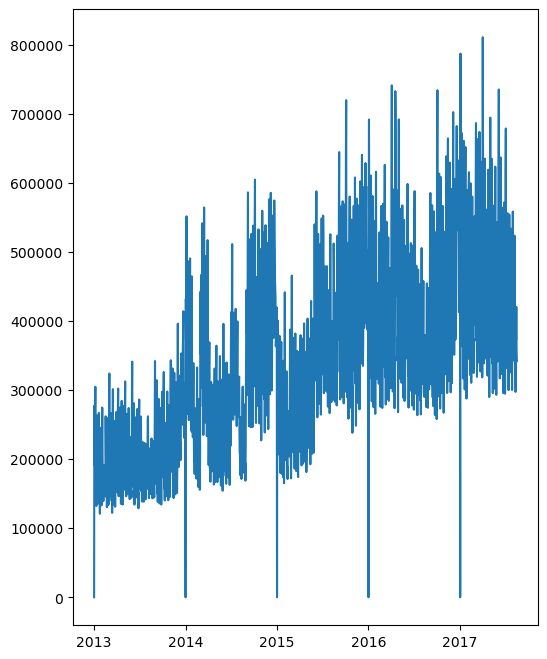

In [10]:
plt.figure(figsize= (6,8))
plt.plot(daily_sales['date'],daily_sales['sales'])
plt.show()

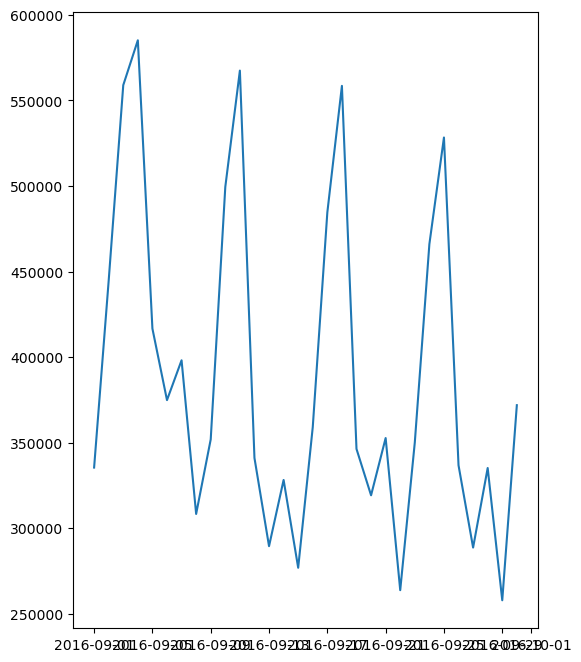

In [11]:
plt.figure(figsize= (6,8))
plt.plot(One_month['date'],One_month['sales'])
plt.show()

In [12]:
One_month['day_of_week'] = One_month['date'].dt.day_of_week

<BarContainer object of 30 artists>

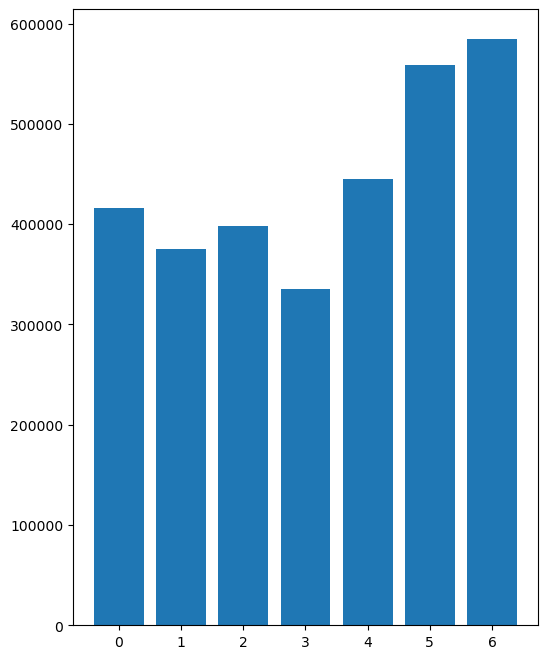

In [13]:
plt.figure(figsize= (6,8))
plt.bar(One_month['day_of_week'], One_month['sales'])
## shown by the peak and valleys it seems that weekends have an increase in sales/
# we will have to take another random couple of months to see if this is a constant or a one off in this month


In [14]:
daily_sales['is_open'] = np.where(daily_sales['sales'] == 0, 1, 0)
daily_sales['day_of_week'] = daily_sales['date'].dt.day_of_week
daily_sales['month'] = daily_sales['date'].dt.month
daily_sales['year'] = daily_sales['date'].dt.year 

In [16]:
daily_sales.set_index('date',inplace= True)

In [17]:
train = daily_sales[daily_sales.index < '2016-08-15']
test = daily_sales[daily_sales.index >= '2016-08-15']

In [18]:
X_train = train.copy()
X_train.drop(columns= 'sales', inplace= True)
y_train = train['sales']



In [19]:
X_test = test.copy()
X_test.drop(columns= 'sales', inplace= True)
y_test = test['sales']

In [20]:
print(X_test.shape)
print(y_test.shape)

(365, 5)
(365,)


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


reg = xgb.XGBRegressor(n_estimators = 10000, early_stopping_rounds = 50 ,learning_rate = .001)
cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

xgb_cv = GridSearchCV(reg, cv_params, scoring='neg_mean_squared_error', cv=5)

xgb_cv.fit(X_train, y_train, 
        eval_set = [(X_train, y_train),(X_test, y_test)], verbose = True 
        )



[0]	validation_0-rmse:296447.86248	validation_1-rmse:403660.18332
[1]	validation_0-rmse:267927.85754	validation_1-rmse:373949.65585
[2]	validation_0-rmse:243639.35376	validation_1-rmse:342460.44792
[3]	validation_0-rmse:220943.73794	validation_1-rmse:313324.12640
[4]	validation_0-rmse:201584.00490	validation_1-rmse:287671.37484
[0]	validation_0-rmse:296750.25829	validation_1-rmse:403699.12628
[1]	validation_0-rmse:269119.82699	validation_1-rmse:374744.74330
[2]	validation_0-rmse:245230.35944	validation_1-rmse:343005.11681
[3]	validation_0-rmse:223514.97010	validation_1-rmse:314350.34922
[4]	validation_0-rmse:205164.38206	validation_1-rmse:289527.96409
[0]	validation_0-rmse:297898.65730	validation_1-rmse:405434.03252
[1]	validation_0-rmse:271762.81974	validation_1-rmse:378130.01631
[2]	validation_0-rmse:249028.81976	validation_1-rmse:345652.36347
[3]	validation_0-rmse:226410.89989	validation_1-rmse:316429.04729
[4]	validation_0-rmse:208383.23333	validation_1-rmse:290077.26353
[0]	valida

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=50,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.001, ma...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    n_estimators=10000, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             scoring='neg_mean_squared_error')

In [50]:
xgb_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
reg = xgb.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             predictor=None)

eval_set = [(X_train, y_train),(X_test, y_test)]
reg.fit(X_train, y_train, 
        eval_set = eval_set, verbose = 10) 

[0]	validation_0-rmse:236055.17111	validation_1-rmse:327332.97140
[10]	validation_0-rmse:43224.25773	validation_1-rmse:78797.94737
[14]	validation_0-rmse:39529.10837	validation_1-rmse:73184.69761


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=15, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index= reg.feature_names_in_,
             columns= ['importance'])
fi

,importance
onpromotion,0.259246
is_open,0.119831
day_of_week,0.380487
month,0.062426
year,0.178011


<Axes: title={'center': 'feature importance'}>

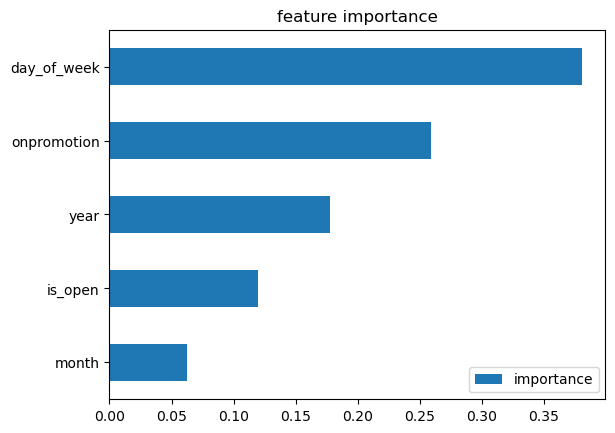

In [53]:
fi.sort_values('importance').plot(kind= 'barh', title = 'feature importance')

In [54]:
test['prediction'] = reg.predict(X_test)

In [55]:
test.head()

,sales,onpromotion,is_open,day_of_week,month,year,prediction
date,,,,,,,
2016-08-15,344057.001,2468,0,0,8,2016,349635.28125
2016-08-16,348810.866,2811,0,1,8,2016,325855.09375
2016-08-17,363365.146,5724,0,2,8,2016,347871.25000
2016-08-18,275509.518,2473,0,3,8,2016,283184.09375
2016-08-19,344346.754,5054,0,4,8,2016,341004.81250


In [56]:
daily_sales = daily_sales.merge(test[['prediction']], how= 'left', left_index= True, right_index= True)

In [57]:
daily_sales

,sales,onpromotion,is_open,day_of_week,month,year,prediction_x,prediction_y
date,,,,,,,,
2013-01-01,0.000,0,1,1,1,2013,NaN,NaN
2013-01-02,277399.374,0,0,2,1,2013,NaN,NaN
2013-01-03,191233.363,0,0,3,1,2013,NaN,NaN
2013-01-04,190918.768,0,0,4,1,2013,NaN,NaN
2013-01-05,265459.371,0,0,5,1,2013,NaN,NaN
...,...,...,...,...,...,...,...,...
2017-08-11,387405.731,5587,0,4,8,2017,374086.12500,341004.81250
2017-08-12,372789.076,2909,0,5,8,2017,449047.71875,443377.37500
2017-08-13,420174.268,3078,0,6,8,2017,466620.34375,493010.34375


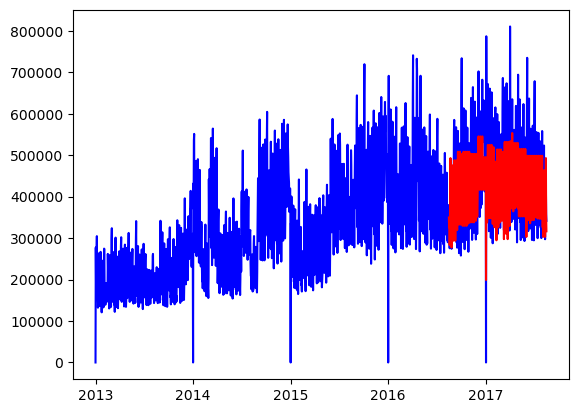

In [59]:
fig, ax = plt.subplots()
ax.plot(daily_sales.index,daily_sales['sales'],color = 'blue')
ax.plot(daily_sales.index,daily_sales['prediction_y'], color = 'red' )

In [60]:
start_date = '2017-02-01'
end_date = '2017-02-28'
One_month_pred = daily_sales[(daily_sales.index >= start_date ) & (daily_sales.index <= end_date)]

In [61]:
One_month_pred.head()

,sales,onpromotion,is_open,day_of_week,month,year,prediction_x,prediction_y
date,,,,,,,,
2017-02-01,495839.274,6538,0,2,2,2017,404690.43750,371691.40625
2017-02-02,369689.258,2923,0,3,2,2017,294358.53125,326353.40625
2017-02-03,442457.302,5794,0,4,2,2017,393134.37500,364824.96875
2017-02-04,597122.837,3059,0,5,2,2017,479211.03125,462105.40625
2017-02-05,615294.223,3319,0,6,2,2017,489241.40625,484272.71875


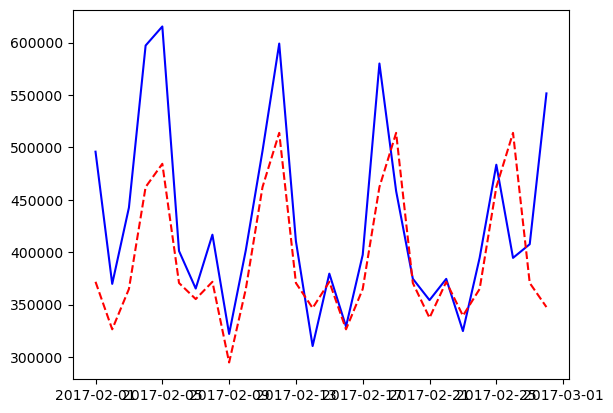

In [62]:
fig, ax = plt.subplots()
ax.plot(One_month_pred.index,One_month_pred['sales'],color = 'blue')
ax.plot(One_month_pred.index,One_month_pred['prediction_y'], color = 'red', linestyle = '--' )

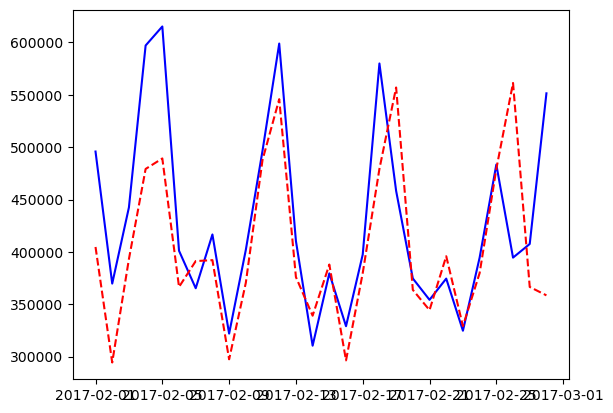

In [63]:
fig, ax = plt.subplots()
ax.plot(One_month_pred.index,One_month_pred['sales'],color = 'blue')
ax.plot(One_month_pred.index,One_month_pred['prediction_x'], color = 'red', linestyle = '--' )